In [1]:
"""
Created on Sat Apr  2 14:34:32 2022
@author: Mehmet
For training code : https://github.com/baloglu321/Opencv_Workspace/blob/master/fruit_classsification_learning.ipynb
"""

import cv2
import numpy as np
import os
import matplotlib.pyplot as mp
from sklearn.preprocessing import LabelEncoder
import warnings
from keras.models import model_from_json



In [2]:
warnings.filterwarnings("ignore")

path="Fruit_360"

mylist=os.listdir(path)

classes=len(mylist)

print("Label (Sınıf) Sayısı",classes)

images=[]
class_name=[]

Label (Sınıf) Sayısı 134


In [3]:
model=model_from_json(open("model.json","r").read())
model.load_weights("fruit_classification.h5")

encoder=LabelEncoder()
encoder.classes_=np.load("classes.npy")


In [4]:
for i in range(classes):
    class_fruit=os.listdir(path+"\\"+mylist[i])
    
    for j in class_fruit:
        img=cv2.imread(path+"\\"+mylist[i]+"\\"+j)
        img=cv2.resize(img, (32,32))
        images.append(img)
        class_name.append(mylist[i])

In [5]:
images=np.array(images)        
size=images.shape[0]   

In [6]:
def Prediction(image):
    global encoder
    image=image/255
    image=np.reshape(image, (-1,32,32,3))
    pred=model.predict(image).argmax()
    
    return encoder.inverse_transform([pred])[0]



1/1 [==============================] - 0s 17ms/step


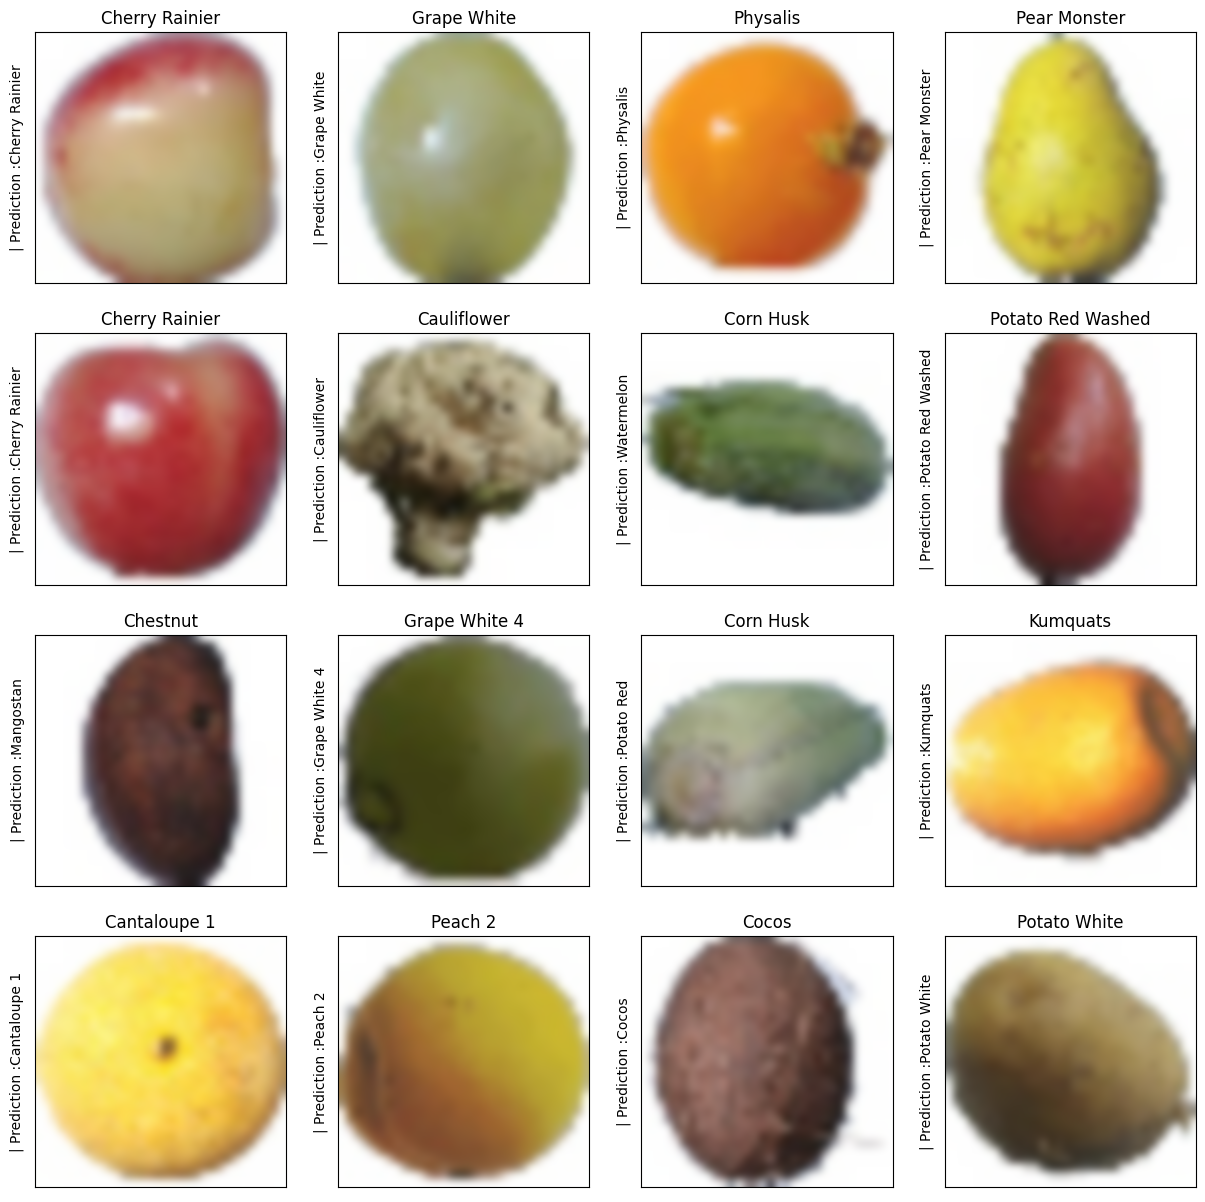

In [7]:
mp.figure(figsize=(15,15))
for i in range(1,17):
    fig=np.random.choice(np.arange(1,size+1))
    pred=Prediction(images[fig])
    img=cv2.cvtColor(images[fig],cv2.COLOR_BGR2RGB )
    mp.subplot(4,4,i)
    mp.imshow(img,origin="upper",interpolation="bicubic")
    mp.title(class_name[fig])
    mp.ylabel(f"| Prediction :{pred}",fontsize=10)
    mp.xticks([]), mp.yticks([])            

mp.show()